This micro project of exploratory data analysis of Amazon Top 50 Bestselling Books 2009 - 2019 dataset. 
Source of dataset = https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

books = pd.read_csv('bestsellers with categories.csv')
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
books.shape

(550, 7)

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Based on that information we get to know that there's 550 list of books with 7 columns consist of:
1. Name : Title of the book
2. Author
3. Average User Rating
4. Numbers of reviews written
5. Price
6. Years the book was published, and
7. Genre consist of Non-Fiction and Fiction

Check if theres NaN values from dataset:

In [9]:
books.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

There's no NaN values in dataset, therefore, we still need to make sure there are no duplicates to ensure valid data analysis.

In [10]:
number_of_duplicate = books['Name'].count() - books['Name'].nunique()
print(number_of_duplicate)

199


In [17]:
books['Name'].value_counts().head(10) #to show top 10 books that have duplicates

Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The Very Hungry Caterpillar                                                           7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
The 5 Love Languages: The Secret to Love That Lasts                                   5
To Kill a Mockingbird                                                                 5
Laugh-Out-Loud Jokes for Kids                                                         5
Name: Name, dtype: int64

In [17]:
loc = books.loc[books['Name'] == 'StrengthsFinder 2.0'] 
print(loc)

                    Name  Author  User Rating  Reviews  Price  Year  \
304  StrengthsFinder 2.0  Gallup          4.0     5069     17  2009   
305  StrengthsFinder 2.0  Gallup          4.0     5069     17  2010   
306  StrengthsFinder 2.0  Gallup          4.0     5069     17  2011   
307  StrengthsFinder 2.0  Gallup          4.0     5069     17  2012   
308  StrengthsFinder 2.0  Gallup          4.0     5069     17  2013   
309  StrengthsFinder 2.0  Gallup          4.0     5069     17  2014   
310  StrengthsFinder 2.0  Gallup          4.0     5069     17  2015   
311  StrengthsFinder 2.0  Gallup          4.0     5069     17  2016   
312  StrengthsFinder 2.0  Gallup          4.0     5069     17  2017   

           Genre  
304  Non Fiction  
305  Non Fiction  
306  Non Fiction  
307  Non Fiction  
308  Non Fiction  
309  Non Fiction  
310  Non Fiction  
311  Non Fiction  
312  Non Fiction  


Both Name and Author have duplicates, but it still can be assume that an author can write more than 1 book. Then deleting duplicate would be better based on the title of the book. The only difference in this data is the Year

In [18]:
books.drop_duplicates(subset='Name', keep='first', inplace=True)
books.shape

(351, 7)

From the amount of the first row, which is 550, we can subtract the amount of number_of_duplicate, which is 199:
550-199 = 351 rows

In [5]:
books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


[Data Visualization]

[Data Distribution]

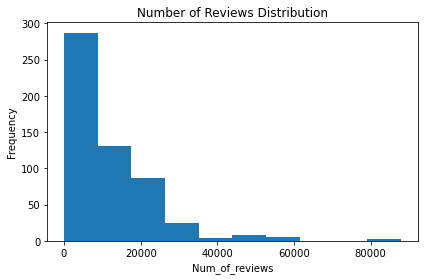

In [9]:
plt.figure()
plt.hist(x='Reviews', data=books)
plt.title('Number of Reviews Distribution')
plt.xlabel('Num_of_reviews')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

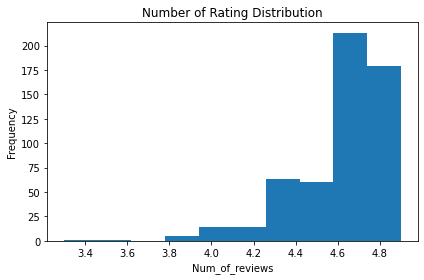

In [11]:
plt.figure()
plt.hist(x='User Rating', data=books)
plt.title('Number of Rating Distribution')
plt.xlabel('Num_of_user_rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

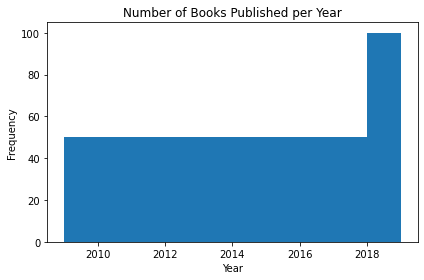

In [13]:
plt.figure()
plt.hist(x='Year', data=books)
plt.title('Number of Books Published per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [20]:
books['User Rating'].max()

4.9

In [21]:
plt.figure()
books.groupby(['Genre', 'Year'])['Genre'].count().unstack().plot(color=#FF9900)
plt.title('Amount of Bestseller Books by Genre per Year')
plt.xlabel('Year')
plt.ylabel('Num_of_books')
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-21-5d9b34b1a8a2>, line 4)